***
# <font color="#B56447">Quantitative Analysis of Socioeconomic Indicators, Crime, and Educational Outcomes in Chicago Communities </font> 
### **S. Taylor**
***

## <font color="#B56447">Project Introduction</font>

This project analyzes multiple datasets related to Chicago’s communities, schools, and crime incidents to uncover trends, patterns, and relationships at the community level. By integrating socioeconomic indicators, school performance metrics, and crime data, the analysis aims to provide insights that can inform policy decisions, resource allocation, and educational interventions.

***
## <font color="#B56447">Project Objective</font>

The objective of this project is to systematically explore and understand the data to support meaningful conclusions. The analysis is organized into four main stages:

1. [**Data Overview & Understanding**](#sec_1)
   - Examine each dataset (`Census_df`, `Schools_df`, `Crime_df`) to understand the structure, variables, and context.  
   - Identify key metrics for community-level comparison, such as socioeconomic indicators, school attendance, and crime counts.
<br><br>
2. [**Data Cleaning & Standardization**](#sec_2)  
   - Apply helper functions to standardize column names and string values for consistency.  
   - Handle missing values thoughtfully, retaining NaNs where appropriate to preserve data integrity and prevent misrepresentation.  
   - Remove non-relevant aggregate records (e.g., citywide summaries) to focus analysis at the community level.
<br><br>
3. [**Exploratory Data Analysis (EDA)**](#sec_3) 
   - Perform descriptive analyses for each dataset individually to identify distributions, trends, and outliers.  
   - Visualize spatial and statistical patterns in crime, school, and socioeconomic data.
<br><br>
4. [**Integrated Analysis: Cross-Dataset Comparisons**](#sec_4)
   - Merge datasets to create a community-level view combining hardship, income, crime, and school attendance metrics.  
   - Explore relationships across datasets, including correlations between socioeconomic conditions, crime rates, and student attendance.  
   - Test initial hypotheses to identify significant interactions and inform further investigation.

***
## <font color="#B56447">Setup</font>

**Data Source:**  

Three CSVs taken from the [Chicago Data Portal](https://data.cityofchicago.org/).
- Chicago census data (DataFrame `Census_df`, loaded from [URL](https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2/about_data))
- Chicago Public Schools data (DataFrame `Schools_df`, loaded from [URL](https://data.cityofchicago.org/Education/Chicago-Public-Schools-Progress-Report-Cards-2011-/9xs2-f89t/about_data))
- Chicago crimes data (DataFrame `Crime_df`, loaded from [URL](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/about_data))

**Tools & Libraries:**  
- Python: `pandas`, `matplotlib`, `seaborn`, `scipy.stats`, `sqlite3` 
- SQL: SQLite3, `%sql` magic in Jupyter Notebook (`ipython-sql`)  
- Jupyter Notebook for interactive analysis and visualization  
- Additional Python utilities: `csv`, `IPython.display` for table formatting

**Setup & Installation:** 
- The CSV file is loaded into a Pandas DataFrame and written to a local SQLite database (`ChicagoDB.db`).  
- A SQLite connection is established to enable SQL-based data transformations and aggregations alongside Python analysis.

In [92]:
%%capture
!pip install pandas ipython-sql
import csv, sqlite3, pandas as pd, matplotlib.pyplot as plt, seaborn as sns 
from IPython.display import display
from scipy.stats import pearsonr

con = sqlite3.connect("ChicagoDB.db")
cur = con.cursor()

%load_ext sql
%sql sqlite:///ChicagoDB.db

In [93]:
# Set style
sns.set_style("whitegrid")
palette = sns.color_palette('twilight')

<a class="anchor" id="sec_1"></a>
***
## **<font color="#B56447">Data Overview</font>**


### `Census_df` | [Socioeconomic Indicators in Chicago](https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2/about_data)

This dataset contains socioeconomic indicator data for Chicago community areas from 2008–2012. It includes measures related to housing, poverty, employment, education, dependency, income, and an overall hardship index.

| Column Name | Description |
|:---------------|------------:|
| `community_area_number` | Community Area number |
| `community_area_name` | Name of the community area |
| `percent_of_housing_crowded` | % of housing units with more than one person per room |
| `percent_households_below_poverty` | % of households below the federal poverty level |
| `percent_aged_16_unemployed` | % of persons age 16+ who are unemployed |
| `percent_aged_25_without_high_school_diploma` | % of persons age 25+ without a high school diploma |
| `percent_aged_under_18_or_over_64` | % of population under 18 or over 64 (dependency) |
| `per_capita_income` | Estimated per capita income for the community area |
| `hardship_index` | Composite score from the six socioeconomic indicators |


### `Schools_df` | [Chicago Public Schools](https://data.cityofchicago.org/Education/Chicago-Public-Schools-Progress-Report-Cards-2011-/9xs2-f89t/about_data)

This dataset contains school-level performance and accountability data used for Chicago Public Schools (CPS) School Report Cards for the 2011–2012 academic year. It includes detailed information on school characteristics, student performance, attendance, assessments, graduation outcomes, and school climate indicators.

| Column Name | Description |
|:---------------|------------:|
| `school_id` | Unique school identifier |
| `name_of_school` | Name of the school |
| `elementary_or_high_school` | School level designation (ES, MS, HS) |
| `street_address` | Street address of the school |
| `city` | City where the school is located |
| `state` | State where the school is located |
| `zip_code` | ZIP code of the school |
| `phone_number` | School phone number |
| `link_` | School website URL |
| `network_manager` | Network manager overseeing the school |
| `collaborative_name` | Collaborative group the school belongs to |
| `adequate_yearly_progress_made_` | Indicator of whether AYP targets were met |
| `track_schedule` | Academic track schedule of the school |
| `cps_performance_policy_status` | CPS probation or performance status |
| `cps_performance_policy_level` | CPS performance level rating |
| `healthy_schools_certified_` | Indicator of healthy schools certification |
| `safety_icon_` | Safety category based on student survey |
| `safety_score` | Student safety score |
| `family_involvement_icon` | Family involvement category |
| `family_involvement_score` | Family involvement score |
| `environment_icon_` | Supportive environment category |
| `environment_score` | Environment score |
| `instruction_icon_` | Ambitious instruction category |
| `instruction_score` | Instruction score |
| `leaders_icon_` | Effective leadership category |
| `leaders_score_` | Leadership score |
| `teachers_icon_` | Collaborative teachers category |
| `teachers_score` | Teachers score |
| `parent_engagement_icon_` | Parent engagement category |
| `parent_engagement_score` | Parent engagement score |
| `parent_environment_icon` | Parent environment category |
| `parent_environment_score` | Parent environment score |
| `average_student_attendance` | Average daily student attendance percentage |
| `rate_of_misconducts_per_100_students_` | Misconduct incidents per 100 students |
| `average_teacher_attendance` | Average daily teacher attendance percentage |
| `individualized_education_program_compliance_rate_` | Percentage of IEP and 504 plans completed on time |
| `pk_2_literacy` | Literacy benchmark attainment for grades K–2 |
| `pk_2_math_` | Math benchmark attainment for grades K–2 |
| `gr3_5_grade_level_math` | Grade-level math attainment for grades 3–5 |
| `gr3_5_grade_level_read_` | Grade-level reading attainment for grades 3–5 |
| `gr3_5_keep_pace_read_` | Reading growth target attainment for grades 3–5 |
| `gr3_5_keep_pace_math` | Math growth target attainment for grades 3–5 |
| `gr6_8_grade_level_math` | Grade-level math attainment for grades 6–8 |
| `gr6_8_grade_level_read` | Grade-level reading attainment for grades 6–8 |
| `gr6_8_keep_pace_math` | Math growth target attainment for grades 6–8 |
| `gr6_8_keep_pace_read` | Reading growth target attainment for grades 6–8 |
| `gr_8_explore_math` | College readiness benchmark in math |
| `gr_8_explore_read` | College readiness benchmark in reading |
| `isat_exceeding_math_` | Percentage exceeding ISAT math standards |
| `isat_exceeding_reading_` | Percentage exceeding ISAT reading standards |
| `isat_value_add_math` | ISAT value-added score in math |
| `isat_value_add_read` | ISAT value-added score in reading |
| `isat_value_add_color_math` | ISAT value-added color rating in math |
| `isat_value_add_color_read` | ISAT value-added color rating in reading |
| `students_taking_algebra` | Percentage of students enrolled in algebra |
| `students_passing_algebra` | Percentage of students passing algebra |
| `_th_grade_explore_2009_` | Average 9th grade EXPLORE score (2009) |
| `_th_grade_explore_2010_` | Average 9th grade EXPLORE score (2010) |
| `_th_grade_plan_2009_` | Average 10th grade PLAN score (2009) |
| `_th_grade_plan_2010_` | Average 10th grade PLAN score (2010) |
| `net_change_explore_and_plan` | Change between EXPLORE and PLAN scores |
| `_th_grade_average_act_2011_` | Average ACT score for 11th graders |
| `net_change_plan_and_act` | Change between PLAN and ACT scores |
| `college_eligibility_` | Percentage of graduates eligible for college |
| `graduation_rate_` | Graduation rate within five years |
| `college_enrollment_rate` | Percentage of students enrolled in college |
| `college_enrollment_number_of_students_` | Number of students enrolled in college |
| `general_services_route_` | General services route number |
| `freshman_on_track_rate` | Percentage of freshmen on track |
| `rcdts_code` | Illinois ISBE region county district school code |
| `x_coordinate` | X coordinate of school location |
| `y_coordinate` | Y coordinate of school location |
| `latitude` | Latitude of school location |
| `longitude` | Longitude of school location |
| `community_area_number` | Community area number |
| `community_area_name` | Community area name |
| `ward` | City Council ward |
| `police_district` | Police district |
| `location` | Formatted location for mapping |


### `Crime_df` | [Chicago Crimes](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/about_data)

This dataset contains reported crime incidents in the City of Chicago from 2001 to the present, excluding the most recent seven days. The data is sourced from the Chicago Police Department’s CLEAR system and includes detailed information on incident types, locations, and outcomes.

| Column Name | Description |
|---------------:|------------:|
| `id` | Unique identifier for the record |
| `case_number` | Chicago Police Department’s unique incident number |
| `date` | Date the incident occurred (sometimes an estimate) |
| `block` | Partially redacted address of the incident’s block |
| `iucr` | Illinois Uniform Crime Reporting code linked to primary type and description |
| `primary_type` | Main category of the IUCR code |
| `description` | Subcategory of the IUCR code |
| `location_description` | Type of location where the incident happened |
| `arrest` | Whether an arrest was made |
| `domestic` | Whether the incident was domestic-related |
| `beat` | Police beat where the incident occurred |
| `district` | Police district of the incident |
| `ward` | City Council ward of the incident |
| `community_area` | Chicago community area where the incident occurred |
| `fbi_code` | Crime classification per FBI’s NIBRS system |
| `x_coordinate` | X coordinate of the location (shifted for privacy) |
| `y_coordinate` | Y coordinate of the location (shifted for privacy) |
| `year` | Year the incident occurred |
| `updated_on` | Last updated date and time for the record |
| `latitude` | Latitude of the incident location (shifted for privacy) |
| `longitude` | Longitude of the incident location (shifted for privacy) |
| `location` | Formatted location for mapping and geographic analysis |

In [94]:
%%capture

Census_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCensusData.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01")
Schools_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoPublicSchools.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01")
Crime_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCrimeData.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01")

<a class="anchor" id="sec_2"></a>
***
## **<font color="#B56447">Data Cleaning</font>**

The goal of the data cleansing process is to produce analytically consistent and well-structured datasets while preserving the integrity and intent of the original source data. Rather than aggressively removing records or imputing values that may distort interpretation, this approach emphasizes standardized formatting, reproducible cleaning logic, and transparency around remaining missing values.

The cleaning steps applied focus on improving usability and consistency across all datasets (`Census_df`, `Schools_df`, and `Crime_df`) to support reliable exploratory analysis and downstream modeling.

### Key fixes applied:

- **Standardizing Column Names**  
  - Removed leading and trailing whitespace  
  - Replaced spaces with underscores and removed commas  
  - Normalized repeated underscores  
  - Converted all column names to lowercase for consistency  
<br>
- **Cleaning String-Based Values**  
  - Stripped extra whitespace from all string (object) columns  
  - Converted text values to lowercase  
  - Normalized underscore formatting to match cleaned column names  
<br>
- **Removal of Citywide Aggregate Record**  
  - Removed the citywide “Chicago” row from `Census_df`, which represents aggregate values rather than a specific community area  
  - This row lacks a valid community area identifier and would otherwise cause incorrect joins with school- and crime-level data  
<br>
- **Consistent Application Across Datasets**  
  - The same helper functions were applied uniformly to all three datasets to ensure consistent structure and naming conventions  

#### Dataset-specific notes on missing values:

- In `Schools_df`, several performance and survey-related fields contain missing values because these measures do not apply to all schools or grade levels. For example:  
  - The `link_` column has one missing value, likely representing a school without a website  
  - The `safety_score`, `environment_score`, and `instruction_score` columns each have 53 missing values, likely corresponding to schools that did not participate in the 5 Essentials survey or where the metric is not applicable  
  - ISAT-related columns have 90–98 missing values, which is expected because these assessments only apply to high schools  
  - The `average_student_attendance` column has one missing value, likely a school that did not report attendance  
  Retaining these NaNs ensures that analyses reflect which metrics are truly relevant to each school and prevents misrepresentation of the data  
<br>
- In `Crime_df`, missing values in spatial fields (`x_coordinate`, `y_coordinate`, `latitude`, `longitude`, and `location`) indicate incidents where precise geographic information was not reported. These rows are preserved to allow analysis of non-spatial metrics such as crime type, arrests, and domestic status, but cannot be used for mapping or spatial joins. Additionally, 43 rows are missing `ward` and `community_area_number`; these values depend on reliable location information, and filling them without verification could misassign incidents, so they are left as NaN to maintain data integrity.

In [95]:
# Function to clean column names
def clean_columns(df): 
    df = df.copy() 
    df.columns = df.columns.str.strip() \
        .str.replace(' ', '_', regex=False) \
        .str.replace(',', '', regex=False) \
        .str.strip('_') \
        .str.replace('__', '_') \
        .str.lower() 
    return df

def clean_string_values(df):
    df = df.copy()
    str_cols = df.select_dtypes(include='object').columns
    
    for col in str_cols:
        df[col] = df[col].str.strip().str.lower().str.strip('_').str.replace('__', '_')
    
    return df

Census_df = clean_string_values(clean_columns(Census_df))
Schools_df = clean_string_values(clean_columns(Schools_df))
Crime_df = clean_string_values(clean_columns(Crime_df))

### `Census_df` | Initial Assessment of Missing Values

A column-level review of the raw data shows that most columns are complete, with missing values in `community_area_number` and `hardship_index`. These gaps reflect a citywide aggregate row labeled "Chicago" that does not correspond to a specific community area. Removing this row resolves the missing values and ensures the dataset is suitable for community-level analysis.

In [96]:
Census_df.head(3).style.hide(axis='index')

community_area_number,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income,hardship_index
1.000000,rogers park,7.700000,23.600000,8.700000,18.200000,27.500000,23939,39.000000
2.000000,west ridge,7.800000,17.200000,8.800000,20.800000,38.500000,23040,46.000000
3.000000,uptown,3.800000,24.000000,8.900000,11.800000,22.200000,35787,20.000000


In [97]:
Census_df.isna().sum()

community_area_number                          1
community_area_name                            0
percent_of_housing_crowded                     0
percent_households_below_poverty               0
percent_aged_16_unemployed                     0
percent_aged_25_without_high_school_diploma    0
percent_aged_under_18_or_over_64               0
per_capita_income                              0
hardship_index                                 1
dtype: int64

#### Removal of Citywide Aggregate Record

The Census dataset includes a final row labeled “Chicago” representing citywide socioeconomic values rather than a specific community area. Since it lacks a valid `Community_Area_Number` and this analysis focuses on community-level comparisons, the row was removed to prevent incorrect joins with school and crime datasets.

In [98]:
Census_df = Census_df[Census_df['community_area_name'] != 'chicago']
Census_df.isna().sum()

community_area_number                          0
community_area_name                            0
percent_of_housing_crowded                     0
percent_households_below_poverty               0
percent_aged_16_unemployed                     0
percent_aged_25_without_high_school_diploma    0
percent_aged_under_18_or_over_64               0
per_capita_income                              0
hardship_index                                 0
dtype: int64

### `Schools_df` | Initial Assessment of Missing Values

A column-level review of the raw data shows that missing values are concentrated in `link`, `safety_score`, `environment_score`, `instruction_score`, `average_student_attendance`, and ISAT-related columns. These gaps reflect metrics that do not apply to certain schools or grade levels, such as small middle or high schools or grades where specific tests are not administered. Retaining these NaNs preserves the accuracy and interpretability of the dataset for school-level analysis.

In [99]:
Schools_df.head(3).style.hide(axis='index')

school_id,name_of_school,elementary_middle_or_high_school,street_address,city,state,zip_code,phone_number,link,network_manager,collaborative_name,adequate_yearly_progress_made,track_schedule,cps_performance_policy_status,cps_performance_policy_level,healthy_school_certified,safety_icon,safety_score,family_involvement_icon,family_involvement_score,environment_icon,environment_score,instruction_icon,instruction_score,leaders_icon,leaders_score,teachers_icon,teachers_score,parent_engagement_icon,parent_engagement_score,parent_environment_icon,parent_environment_score,average_student_attendance,rate_of_misconducts_per_100_students,average_teacher_attendance,individualized_education_program_compliance_rate,pk_2_literacy,pk_2_math,gr3_5_grade_level_math,gr3_5_grade_level_read,gr3_5_keep_pace_read,gr3_5_keep_pace_math,gr6_8_grade_level_math,gr6_8_grade_level_read,gr6_8_keep_pace_math,gr6_8_keep_pace_read,gr_8_explore_math,gr_8_explore_read,isat_exceeding_math,isat_exceeding_reading,isat_value_add_math,isat_value_add_read,isat_value_add_color_math,isat_value_add_color_read,students_taking_algebra,students_passing_algebra,9th_grade_explore_(2009),9th_grade_explore_(2010),10th_grade_plan_(2009),10th_grade_plan_(2010),net_change_explore_and_plan,11th_grade_average_act_(2011),net_change_plan_and_act,college_eligibility,graduation_rate,college_enrollment_rate,college_enrollment,general_services_route,freshman_on_track_rate,x_coordinate,y_coordinate,latitude,longitude,community_area_number,community_area_name,ward,police_district,location
610038,abraham lincoln elementary school,es,615 w kemper pl,chicago,il,60614,(773) 534-5720,http://schoolreports.cps.edu/schoolprogressreport_eng/spring2011eng_610038.pdf,fullerton elementary network,north-northwest side collaborative,no,standard,not on probation,level 1,yes,very strong,99.000000,very strong,99,strong,74.000000,strong,66.000000,weak,65,strong,70,strong,56,average,47,96.00%,2.000000,96.40%,95.80%,80.1,43.3,89.6,84.9,60.7,62.6,81.9,85.2,52,62.4,66.3,77.9,69.700000,64.400000,0.200000,0.900000,yellow,green,67.1,54.5,nda,nda,nda,nda,nda,nda,nda,nda,nda,nda,813,33,nda,1171699.458000,1915829.428000,41.924497,-87.644522,7,lincoln park,43,18,"(41.92449696, -87.64452163)"
610281,adam clayton powell paideia community academy elementary school,es,7511 s south shore dr,chicago,il,60649,(773) 535-6650,http://schoolreports.cps.edu/schoolprogressreport_eng/spring2011eng_610281.pdf,skyway elementary network,south side collaborative,no,track_e,not on probation,level 1,no,average,54.000000,strong,66,strong,74.000000,very strong,84.000000,weak,63,strong,76,weak,46,average,50,95.60%,15.700000,95.30%,100.00%,62.4,51.7,21.9,15.1,29,42.8,38.5,27.4,44.8,42.7,14.1,34.4,16.800000,16.500000,0.700000,1.400000,green,green,17.2,27.3,nda,nda,nda,nda,nda,nda,nda,nda,nda,nda,521,46,nda,1196129.985000,1856209.466000,41.760324,-87.556736,43,south shore,7,4,"(41.76032435, -87.55673627)"
610185,adlai e stevenson elementary school,es,8010 s kostner ave,chicago,il,60652,(773) 535-2280,http://schoolreports.cps.edu/schoolprogressreport_eng/spring2011eng_610185.pdf,midway elementary network,southwest side collaborative,no,standard,not on probation,level 2,no,strong,61.000000,nda,nda,average,50.000000,weak,36.000000,weak,nda,nda,nda,average,47,weak,41,95.70%,2.300000,94.70%,98.30%,53.7,26.6,38.3,34.7,43.7,57.3,48.8,39.2,46.8,44,7.5,21.9,18.300000,15.500000,-0.900000,-1.000000,red,red,nda,nda,nda,nda,nda,nda,nda,nda,nda,nda,nda,nda,1324,44,nda,1148427.165000,1851012.215000,41.747111,-87.731702,70,ashburn,13,8,"(41.74711093, -87.73170248)"


In [100]:
nan_counts_schools = Schools_df.isna().sum()
nan_counts_schools[nan_counts_schools > 0]

link                           1
safety_score                  53
environment_score             53
instruction_score             53
average_student_attendance     1
isat_exceeding_math           90
isat_exceeding_reading        90
isat_value_add_math           98
isat_value_add_read           98
dtype: int64

#### Rationale for Retaining Missing Values 

Some missing values in `Schools_df` are expected and meaningful, reflecting metrics that do not apply to certain schools or grade levels. For instance, the link column has one missing value, likely from a single school without a website. The `safety_score`, `environment_score`, and `instruction_score` columns each have 53 missing values, probably for schools that did not participate in the 5 Essentials survey or where these metrics are not applicable, such as small middle or high schools. The `average_student_attendance` column has one missing value, likely a school that did not report attendance. ISAT-related columns have 90–98 missing values, which is expected because these tests only apply to high schools, so most elementary and middle schools naturally have NaNs. Filling in these missing values could misrepresent the data, so they are retained as-is to accurately reflect which metrics are relevant for each school.

### `Crime_df` | Initial Assessment of Missing Values

A column-level review of the raw data shows that missing values are present in `x_coordinate`, `y_coordinate`, `latitude`, `longitude`, `location`, `ward`, and `community_area_number`. These gaps indicate incidents with imprecise location information, which cannot be reliably inferred. Retaining these NaNs allows non-spatial analyses to proceed while preserving the integrity of the dataset for spatial joins where data is available.

In [101]:
Crime_df.head(3).style.hide(axis='index')

id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area_number,fbicode,x_coordinate,y_coordinate,year,latitude,longitude,location
3512276,hk587712,2004-08-28,047xx s kedzie ave,890,theft,from building,small retail store,False,False,911,9,14.000000,58.000000,6,1155838.000000,1873050.000000,2004,41.807440,-87.703956,"(41.8074405, -87.703955849)"
3406613,hk456306,2004-06-26,009xx n central park ave,820,theft,$500 and under,other,False,False,1112,11,27.000000,23.000000,6,1152206.000000,1906127.000000,2004,41.898280,-87.716406,"(41.898279962, -87.716405505)"
8002131,ht233595,2011-04-04,043xx s wabash ave,820,theft,$500 and under,nursing home/retirement home,False,False,221,2,3.000000,38.000000,6,1177436.000000,1876313.000000,2011,41.815933,-87.624642,"(41.815933131, -87.624642127)"


In [102]:
nan_counts_crime = Crime_df.isna().sum()
nan_counts_crime[nan_counts_crime > 0]

ward                     43
community_area_number    43
x_coordinate              4
y_coordinate              4
latitude                  4
longitude                 4
location                  4
dtype: int64

#### Rationale for Retaining Missing Values 

Some rows in `Crime_df` have missing values for `x_coordinate`, `y_coordinate`, `latitude`, `longitude`, and `location`. These NaNs indicate that the incident’s precise location was not reported. Since there is no reliable way to approximate these locations, the rows are left as-is. They can still be analyzed for non-spatial metrics (e.g., crime type or arrests), but cannot be used for mapping or spatial joins. Additionally, 43 rows are missing ward and `community_area_number`. These columns rely on accurate location information to assign incidents to the correct administrative areas. Filling these values without verified location data could misassign incidents, so they are also left as NaN to preserve data integrity.

### Upload DataFrames to Database

In [103]:
%%capture

Census_df.to_sql("CENSUS_DATA", con, if_exists='replace', index=False, method="multi")
Schools_df.to_sql("SCHOOLS_DATA", con, if_exists='replace', index=False, method="multi")
Crime_df.to_sql("CRIME_DATA", con, if_exists='replace', index=False, method="multi")

<a class="anchor" id="sec_3"></a>
***
## **<font color="#B56447">Exploratory Data Analysis (EDA)</font>**

This section explores the three datasets (`Crime_df`, `Schools_df`, `Census_df`) individually to understand distributions, trends, and patterns within each dataset. The analysis of each dataset highlights key metrics, temporal and spatial trends, and community-level insights.  

#### 1. [Census Data | `Census_df`](#sec_3.1)
- **Identify Extremes (Top & Bottom Communities)**
  - Communities with highest and lowest values for key socioeconomic indicators
- **Indicator-by-Indicator Focus (Strip Plots)**
  - Visualization of top and bottom communities per indicator
- **Correlation Heatmap | Census Indicators Only**
  - Relationships between numeric census indicators

#### 2. [School Data | `Schools_df`](#sec_3.2)
- **Summary Statistics**
  - Number of schools by level (`elementary`, `middle`, `high`)
  - Average student attendance by school level
- **Summary Table**
  - Consolidated table showing school counts and average attendance per level

#### 3. [Crime Data | `Crime_df`](#sec_3.3)
- **Summary Statistics**
  - Total number of incidents and top crime types
  - Arrest rates and domestic-related incidents
- **Time Trends**
  - Annual trends in crime counts
- **Spatial Distribution**
  - Crime hotspots and community area clustering
 
This structured approach provides a clear understanding of each dataset before moving on to integrated analyses across socioeconomic, educational, and crime indicators.

<a class="anchor" id="sec_3.1"></a>
### <font color="#B56447">1. Census Data | `Census_df`</font>

This subsection examines the city’s census dataset `Census_df` to understand socioeconomic conditions across community areas. The analysis focuses on identifying communities with extreme values for key indicators and exploring correlations between these indicators to highlight areas of potential hardship or advantage.

**Key Takeaways:**
- Certain communities consistently rank high on hardship indicators (e.g., Riverdale, Fuller Park, South Lawndale), while others show low values (e.g., Lincoln Park, Near North Side, Loop).  
- Indicators such as poverty, unemployment, and lack of high school diploma are strongly correlated, suggesting that multiple socioeconomic challenges often co-occur.  
- Per capita income is strongly negatively correlated with hardship-related indicators, emphasizing income as a key driver of community well-being.  
- Demographic distributions (age extremes) also vary widely, highlighting populations that may require targeted services.  

#### Identify Extremes (Top & Bottom Communities)

These analyses systematically extract the top 3 and bottom 3 communities for each key census indicator, including housing crowding, poverty, unemployment, educational attainment, age distribution, per capita income, and hardship index. This helps highlight both the most and least challenged areas in the city.

**Key Takeaways:**
- Gage Park, South Lawndale, and Humboldt Park have the highest housing crowding, while North Center, Lincoln Park, and Morgan Park have the lowest.  
- Riverdale, Fuller Park, and Englewood have the highest poverty rates, whereas Edison Park, Mount Greenwood, and Beverly have the lowest.  
- West Englewood, Riverdale, and Fuller Park have the highest youth unemployment, while Lake View, Near South Side, and Lincoln Park have the lowest.  
- High per capita income is concentrated in Near North Side, Lincoln Park, and Loop, while the lowest incomes are in Riverdale, South Lawndale, and Fuller Park.  
- The hardship index highlights communities facing multiple disadvantages, with Riverdale, Fuller Park, and South Lawndale at the highest end.  

In [104]:
# systematically extract the top 3 and bottom 3 communities for every indicator.
indicators = [
    'percent_of_housing_crowded',
    'percent_households_below_poverty',
    'percent_aged_16_unemployed',
    'percent_aged_25_without_high_school_diploma',
    'percent_aged_under_18_or_over_64',
    'per_capita_income',
    'hardship_index'
]

extreme_rows = []

for col in indicators:
    top = Census_df.nlargest(3, col)
    bottom = Census_df.nsmallest(3, col)
    
    for _, row in top.iterrows():
        extreme_rows.append({
            'indicator': col,
            'community_area_name': row['community_area_name'],
            'value': row[col],
            'group': 'Highest'
        })
        
    for _, row in bottom.iterrows():
        extreme_rows.append({
            'indicator': col,
            'community_area_name': row['community_area_name'],
            'value': row[col],
            'group': 'Lowest'
        })

extremes_df = pd.DataFrame(extreme_rows)


**Census Extremes Strip Plots**  
The strip plots visualize the top and bottom communities for each indicator, allowing for quick identification of which areas face the most and least socioeconomic challenges.

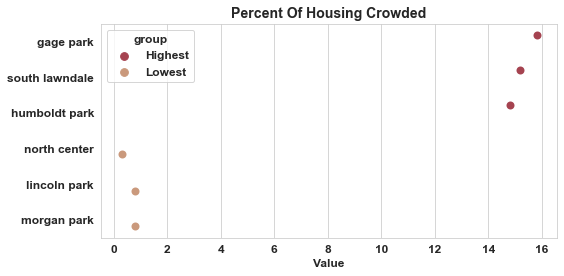

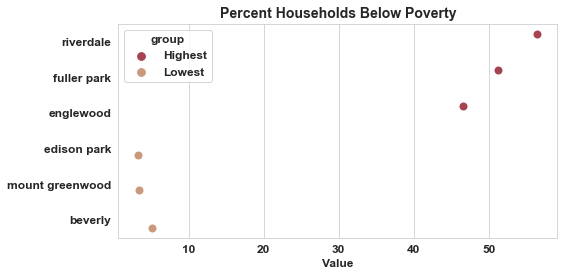

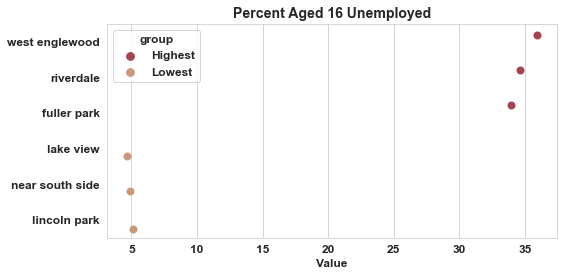

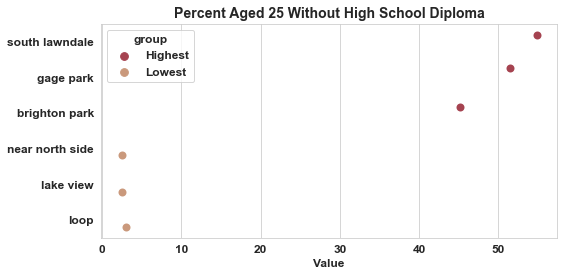

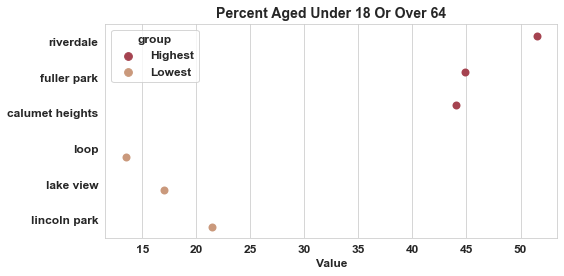

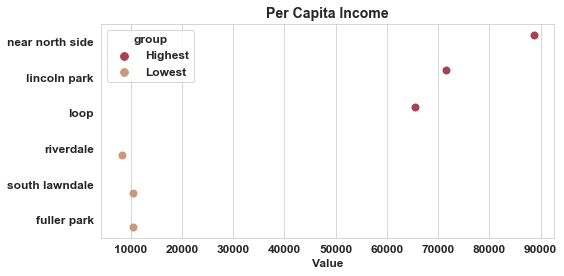

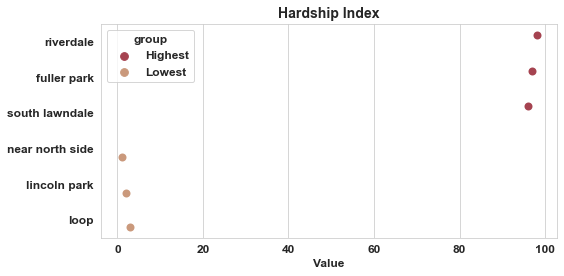

In [105]:

for col in indicators:
    subset = extremes_df[extremes_df['indicator'] == col]
    
    plt.figure(figsize=(8, 4))
    sns.stripplot(
        data=subset,
        x='value',
        y='community_area_name',
        palette=palette[4:],
        hue='group',
        dodge=True,
        size=8
    )
    
    plt.title(
        col.replace('_', ' ').title(),
        fontsize=14,
        fontweight='bold'
    )
    plt.xlabel('Value', fontsize=12, fontweight='bold')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()


#### Correlation Heatmap | Census Indicators Only

This analysis calculates pairwise correlations between numeric census indicators to uncover relationships and patterns. The resulting heatmap provides a visual overview of how socioeconomic factors, age distribution, and income relate to each other across community areas.

**Key Takeaways:**
- Poverty, unemployment, lack of high school diploma, and hardship index are strongly positively correlated, indicating overlapping challenges.  
- Per capita income is strongly negatively correlated with hardship indicators, highlighting income as a protective factor.  
- Housing crowding is highly correlated with the percentage of residents without a high school diploma, suggesting potential links between education and living conditions.  
- Age extremes (under 18 or over 64) show moderate correlations with unemployment and hardship, indicating vulnerable populations.

In [106]:
corr = Census_df.select_dtypes(include='number').corr()


**Correlation Heatmap (Figure)**  
The heatmap visually represents the correlations between numeric census indicators. Darker shades indicate stronger correlations, allowing quick identification of relationships such as the negative correlation between income and hardship or the clustering of poverty-related indicators.

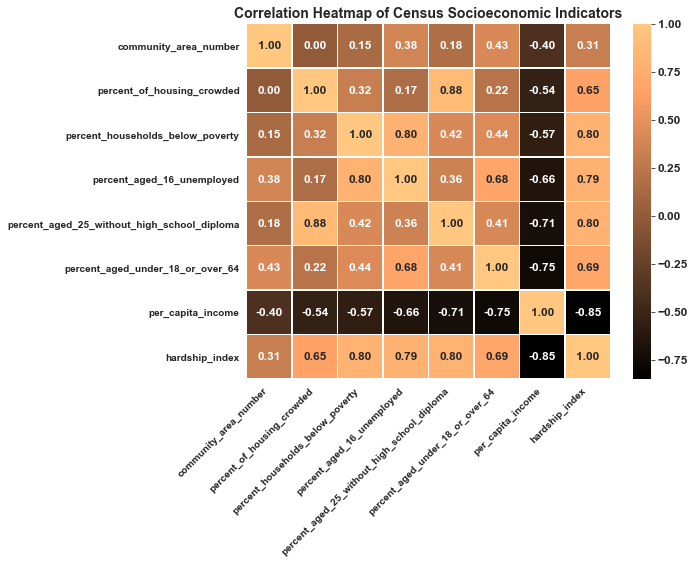

In [107]:
# Select only numeric columns (community_area_number excluded automatically if non-numeric)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    corr,
    annot=True,
    fmt='.2f',
    cmap='copper',
    linewidths=0.5
)

# Set tick label font size and weight
ax.set_xticklabels(
    ax.get_xticklabels(),
    fontsize=10,
    fontweight='bold',
    rotation=45,
    ha='right'
)

ax.set_yticklabels(
    ax.get_yticklabels(),
    fontsize=10,
    fontweight='bold'
)

plt.title(
    'Correlation Heatmap of Census Socioeconomic Indicators',
    fontsize=14,
    fontweight='bold'
)
plt.tight_layout()

<a class="anchor" id="sec_3.2"></a>
### <font color="#B56447">2. School Data | `Schools_df`</font>

This subsection examines the city’s schools dataset `Schools_df` to understand the distribution of schools by level and patterns in student attendance. Insights from this analysis can help identify potential disparities in school resources, engagement, and performance across different school types.

**Key Takeaways:**
- Elementary schools are by far the most numerous, with 462 schools, compared to 93 high schools and 11 middle schools.  
- Average student attendance is high overall, but high schools have lower attendance (83.56%) compared to elementary (94.02%) and middle schools (94.67%).  
- The data suggests that student engagement is generally strong in early education but drops in high school, highlighting potential areas for intervention.  

#### Summary Statistics

These analyses categorize schools into elementary (es), middle (ms), and high (hs) levels to understand the distribution of educational institutions across the city, and calculate the average student attendance for each level to provide insights into student engagement and potential areas needing attention.

**Key Takeaways:**
- The city has 462 elementary schools, 93 high schools, and 11 middle schools, with elementary schools making up the vast majority and middle schools being the least represented.  
- Student attendance is very high in elementary and middle schools (~94%) but noticeably lower in high schools (83.56%), indicating potential challenges with engagement or retention at higher grade levels.  
- These patterns highlight areas for potential policy intervention, particularly to support attendance and engagement in high schools.

In [108]:
# Number of schools by level
school_count = Schools_df['elementary_middle_or_high_school'].value_counts()
# Remove % sign
Schools_df['average_student_attendance'] = Schools_df['average_student_attendance'].astype(str).str.rstrip('%')
# Convert to numeric
Schools_df['average_student_attendance'] = pd.to_numeric(Schools_df['average_student_attendance'], errors='coerce')
atten_avg = Schools_df.groupby('elementary_middle_or_high_school')['average_student_attendance'].mean().round(2)

#### Summary Table
The table summarizes the number of schools and average student attendance for each school level. It provides a clear overview of the distribution and engagement trends across the city’s educational institutions.

In [109]:
levels = ['es', 'ms', 'hs']

school_summary = pd.DataFrame({
    'School Level': [lvl for lvl in levels],
    'Number of Schools': school_count.reindex(levels, fill_value=0).values,
    'Avg. Student Attendance (%)': atten_avg.reindex(levels, fill_value=0).round(2).values
})

# Display styled table with hidden index
school_summary.style.format({'Avg. Student Attendance (%)': '{:.2f}%'}).hide(axis='index')

School Level,Number of Schools,Avg. Student Attendance (%)
es,462,94.02%
ms,11,94.67%
hs,93,83.56%


<a class="anchor" id="sec_3.3"></a>
### <font color="#B56447">3. Crime Data | `Crime_df`</font>

This subsection examines the city’s crime dataset `Crime_df` to identify patterns in crime types, temporal trends, and geographic hotspots. Understanding these aspects is critical for detecting high-risk areas and informing strategies for prevention and law enforcement resource allocation.


**Key Takeaways:**
- Theft, battery, and criminal damage are the most frequently reported crimes, making up a significant portion of all incidents.  
- Approximately 31% of incidents result in an arrest, while around 15% are domestic-related.  
- Overall crime rates fluctuate across years, with notable decreases after 2009 and very low incidents in 2018.  
- Crime is unevenly distributed across neighborhoods, with certain community areas showing consistently higher incident counts.  
- Spatial analysis highlights concentrated clusters of crime in specific areas, suggesting targeted intervention opportunities.


#### Summary Statistics

This analysis provides an overview of the dataset, including total incidents, the most common crime types, arrest rates, and domestic-related incidents. It establishes a baseline understanding of crime patterns before examining temporal and spatial trends.

**Key Takeaways:**
- Total number of reported incidents: 533.  
- Top 3 crime types: theft (106), battery (92), and criminal damage (58).  
- Arrests are made in approximately 31% of cases.  
- Around 15% of incidents are domestic-related.  
- Crime type distribution is skewed, with a few categories accounting for most incidents.


In [110]:
# Total number of incidents
total_incidents = Crime_df.shape[0]

# Number of incidents by primary type
crime_type_counts = Crime_df['primary_type'].value_counts()

# Number of incidents by FBI code
fbi_counts = Crime_df['fbicode'].value_counts()

# Arrest rates and domestic-related incidents
arrest_rate = Crime_df['arrest'].mean()
domestic_rate = Crime_df['domestic'].mean()

print(f"Total incidents: {total_incidents}")
print("\nTop 10 crime types:\n", crime_type_counts.head(10))
print("\nArrest rate:", arrest_rate)
print("\nDomestic-related rate:", domestic_rate)

Total incidents: 533

Top 10 crime types:
 theft                  106
battery                 92
criminal damage         58
narcotics               54
other offense           32
assault                 32
burglary                30
motor vehicle theft     24
robbery                 20
deceptive practice      20
Name: primary_type, dtype: int64

Arrest rate: 0.3058161350844278

Domestic-related rate: 0.14821763602251406


**Top 10 Crime Types (Bar Chart)**  
This bar chart visualizes the top 10 most frequently reported crime types. It allows us to quickly identify which crimes dominate the dataset and provides context for prioritizing interventions.  

**Arrest Rate (Pie Chart)**  
The pie chart shows the proportion of incidents that resulted in an arrest versus those that did not. This highlights how often crimes lead to legal consequences.  

**Domestic-Related Incidents (Pie Chart)**  
This pie chart depicts the proportion of domestic-related incidents compared to non-domestic ones, offering insight into the prevalence of domestic crimes.

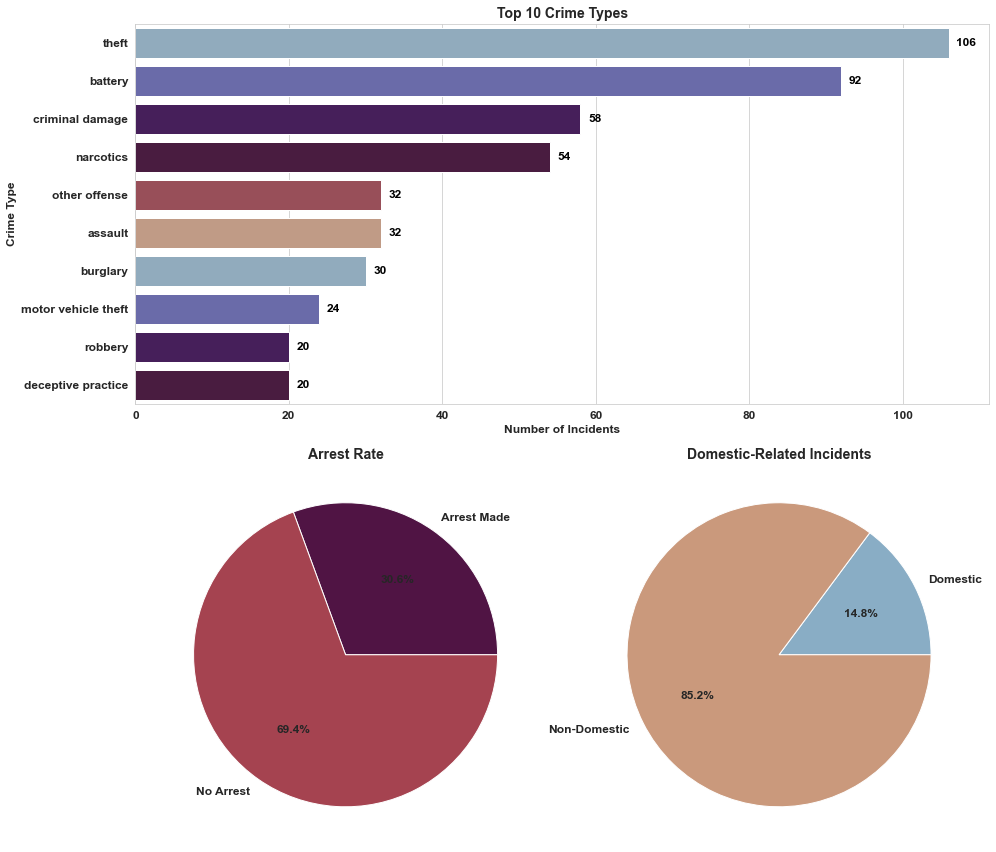

In [111]:
# Prepare data
top_crimes = Crime_df['primary_type'].value_counts().head(10)
arrest_counts = [Crime_df['arrest'].sum(), (~Crime_df['arrest']).sum()]
domestic_counts = [Crime_df['domestic'].sum(), (~Crime_df['domestic']).sum()]

# Create figure with 2 rows: bar on top, pies below
fig = plt.figure(figsize=(14, 12))

# --- Top: Bar chart ---
ax1 = plt.subplot2grid((2, 1), (0, 0))
sns.barplot(x=top_crimes.values, y=top_crimes.index, palette=palette, ax=ax1)
ax1.set_title('Top 10 Crime Types', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Incidents', fontsize=12, fontweight='bold')
ax1.set_ylabel('Crime Type', fontsize=12, fontweight='bold')

# Annotate bars with counts
for i, v in enumerate(top_crimes.values):
    ax1.text(v + 1, i, str(v), color='black', va='center')

# --- Bottom: Pie charts ---
ax2 = plt.subplot2grid((2, 2), (1, 0))
ax2.pie(arrest_counts, labels=['Arrest Made', 'No Arrest'], autopct='%1.1f%%',
        colors=palette[3:5])
ax2.set_title('Arrest Rate', fontsize=14, fontweight='bold')

ax3 = plt.subplot2grid((2, 2), (1, 1))
ax3.pie(domestic_counts, labels=['Domestic', 'Non-Domestic'], autopct='%1.1f%%',
        colors = [palette[0], palette[5]])
ax3.set_title('Domestic-Related Incidents', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

#### Time Trends

Time-based analysis explores how crime rates vary over years, helping to identify trends, seasonal peaks, and periods of heightened activity. This can reveal long-term changes and highlight years with unusually high or low incidents.


**Key Takeaways:**
- Annual incidents fluctuate, with peaks in 2005 (44 incidents) and dips in 2018 (3 incidents).  
- Crime rates generally decline after 2009, suggesting either improved reporting or reduction in incidents.  
- Certain crime types may follow seasonal or long-term trends (specific type-level trends could be explored further).  

In [112]:
# Ensure date column is datetime
Crime_df['date'] = pd.to_datetime(Crime_df['date'], errors='coerce')

# Incidents per year
incidents_per_year = Crime_df.groupby(Crime_df['date'].dt.year).size()

**Crimes per Year (Line Plot)**  
This line plot shows the total number of incidents per year. It helps identify trends over time, including years with unusually high or low crime rates, which may be tied to policy changes, reporting practices, or other factors.

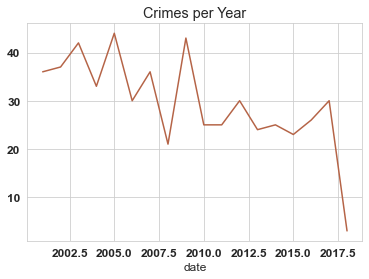

In [113]:
incidents_per_year.plot(kind='line', title='Crimes per Year', color="#B56447")

#### Spatial Distribution

Mapping crime incidents geographically highlights clusters and hotspots across neighborhoods. Understanding these spatial patterns supports targeted interventions and resource planning for high-risk areas.

**Key Takeaways:**
- Community areas 25, 23, and 68 report the highest number of incidents (43, 22, and 21 respectively).  
- Crime is concentrated in specific neighborhoods, showing clear spatial clustering.  
- Scatter plots of longitude vs latitude reveal dense clusters in urban cores, suggesting areas for focused policing or preventive measures.

In [114]:
# Crime counts by community area
crime_by_community = Crime_df.groupby('community_area_number').size().sort_values(ascending=False)

**Crime Locations (Scatter Plot)**  
The scatter plot maps individual crime incidents by latitude and longitude. It visualizes hotspots and clustering in specific parts of the city.

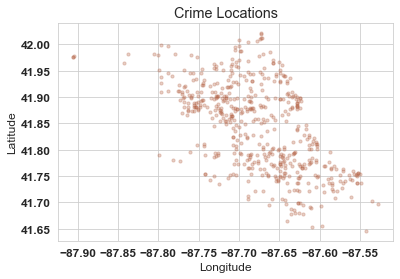

In [115]:
plt.scatter(Crime_df['longitude'], Crime_df['latitude'], alpha=0.3, s=10, color="#B56447")
plt.title('Crime Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<a class="anchor" id="sec_4"></a>
***
## **<font color="#B56447">Integrated Analysis: Cross-Dataset Comparisons</font>**

This section examines relationships between socioeconomic indicators, crime, and school metrics by combining the three datasets (`Census_df`, `Schools_df`, `Crime_df`) into a single, community-level dataset. Analysis includes merging datasets to create a unified view and exploring hypotheses to test potential interactions between hardship, income, crime rates, and student attendance.

### [1. Data Integration: Merging Datasets](#sec_4.1)
- Combined dataset with hardship index, per capita income, poverty rates, total crimes, and average student attendance per community
- Data cleaning ensured numeric columns were properly formatted and key missing values were handled to provide a reliable dataset

### [2. Hypothesis Exploration | Relationships Between Hardship, Crime, and Schools](#sec_4.2)
- Testing potential relationships between socioeconomic factors, crime rates, and student attendance
- Examined correlations between hardship index and total crimes, hardship index and student attendance, and per capita income with both crime and attendance
- Highlighted areas for further investigation, particularly where socioeconomic conditions may influence crime and school engagement

<a class="anchor" id="sec_4.1"></a>
### <font color='#4575b4'>1. Data Integration: Merging Datasets</font>

This step combines census, school, and crime data by community area to create a single dataset for analysis. The merged dataset includes hardship index, per capita income, poverty rates, total crimes, and average student attendance for each community.

**Key Takeaways:**
- The merged dataset allows comparisons across social, educational, and safety metrics.  
- Data cleaning ensured numeric columns were properly formatted and rows with missing values in key columns were removed.  
- Each community area now has metrics for crime totals, student attendance, and socioeconomic indicators, enabling future comparative analyses.

In [116]:
%%capture
%%sql
-- Crime incidents per community area
CREATE VIEW crime_by_community AS
SELECT
    community_area_number,
    COUNT(*) AS total_crimes
FROM CRIME_DATA
WHERE community_area_number IS NOT NULL
GROUP BY community_area_number;

In [117]:
%%capture
%%sql
-- School metrics per community area
CREATE VIEW school_by_community AS
SELECT
    community_area_number,
    AVG(average_student_attendance) AS avg_student_attendance
FROM SCHOOLS_DATA
WHERE community_area_number IS NOT NULL
GROUP BY community_area_number;

In [118]:
%%capture
%%sql
DROP VIEW census_cross_data;

-- Join everything to Census
CREATE VIEW census_cross_data AS
SELECT
    c.community_area_number,
    c.community_area_name,
    c.hardship_index,
    c.per_capita_income,
    c.percent_households_below_poverty,
    cbc.total_crimes,
    sbc.avg_student_attendance
FROM CENSUS_DATA c
LEFT JOIN crime_by_community cbc
    ON c.community_area_number = cbc.community_area_number
LEFT JOIN school_by_community sbc
    ON c.community_area_number = sbc.community_area_number;

In [119]:
cross_df = pd.read_sql("SELECT * FROM census_cross_data", con)

# Ensure numeric columns
cross_df['total_crimes'] = pd.to_numeric(cross_df['total_crimes'], errors='coerce')
cross_df['avg_student_attendance'] = pd.to_numeric(cross_df['avg_student_attendance'], errors='coerce')
cross_df['hardship_index'] = pd.to_numeric(cross_df['hardship_index'], errors='coerce')

# Drop rows with NaNs in relevant columns
cross_df = cross_df.dropna(subset=['total_crimes', 'avg_student_attendance', 'hardship_index'])

<a class="anchor" id="sec_4.1"></a>
### <font color='#4575b4'>2. Hypothesis Exploration | Relationships Between Hardship, Crime, and Schools</font>

This analysis tests potential relationships between socioeconomic conditions, crime rates, and student attendance at the community level. Using the merged dataset (`cross_df`), we define four hypotheses comparing hardship index and per capita income with total crimes and average student attendance. Pearson correlation is used to quantify relationships, and scatterplots with regression lines visualize these trends.

**Key Takeaways:**
- **Hardship Index vs Total Crimes:** A weak but significant positive correlation (r = 0.29, p = 0.0155) suggests that communities with higher hardship indices tend to have slightly higher total crime counts.  
- **Hardship Index vs Average Student Attendance:** A weak negative correlation (r = -0.20, p = 0.0807) indicates that higher hardship may be associated with lower student attendance, but the relationship is not statistically significant.  
- **Per Capita Income vs Total Crimes:** No significant correlation (r = -0.09, p = 0.4676) is observed between income and total crimes in this dataset.  
- **Per Capita Income vs Average Student Attendance:** A weak positive correlation (r = 0.18, p = 0.1218) suggests higher income may be associated with higher attendance, though this is not statistically significant.

**Scatterplots with Regression Lines (Figures)**  
Each scatterplot visualizes the relationship between two variables along with a fitted regression line. The plots help identify trends, deviations, and potential patterns that may warrant further investigation.  

- *Hardship Index vs Total Crimes* – Communities with higher hardship show a slight increase in crime counts.  
- *Hardship Index vs Average Student Attendance* – Attendance slightly decreases in higher-hardship areas.  
- *Per Capita Income vs Total Crimes* – No clear trend between income and crime counts.  
- *Per Capita Income vs Average Student Attendance* – Slight positive trend for attendance with higher income, but not statistically significant.

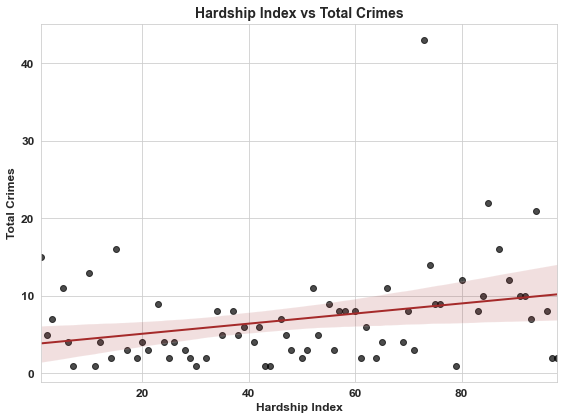


Hardship Index vs Total Crimes:

Research Question: Is socioeconomic hardship associated with higher total crime counts at the community level?

H₁: Higher hardship index is associated with higher total crimes.
H₀: There is no relationship between hardship index and total crimes.

Correlation: 0.29, p-value: 0.0155
Decision: Reject H₀ – significant relationship



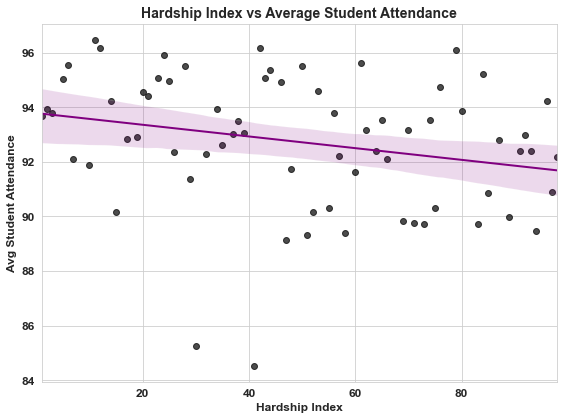


Hardship Index vs Average Student Attendance:

Research Question: Is socioeconomic hardship associated with lower student attendance at the community level?

H₁: Higher hardship index is associated with lower student attendance.
H₀: There is no relationship between hardship index and average student attendance.

Correlation: -0.25, p-value: 0.0365
Decision: Reject H₀ – significant relationship



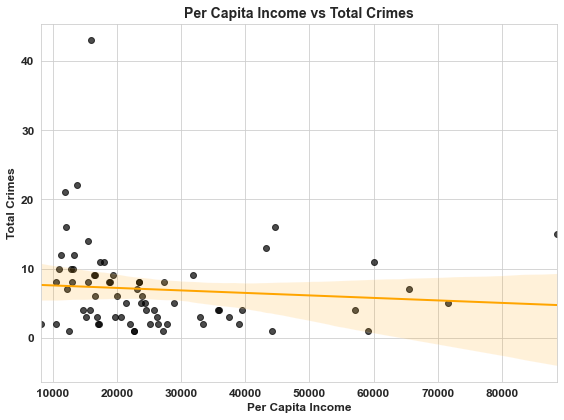


Per Capita Income vs Total Crimes:

Research Question: Is higher per capita income associated with lower total crime counts?

H₁: Higher per capita income is associated with lower total crimes.
H₀: There is no relationship between per capita income and total crimes.

Correlation: -0.09, p-value: 0.4676
Decision: Fail to reject H₀ – no significant relationship



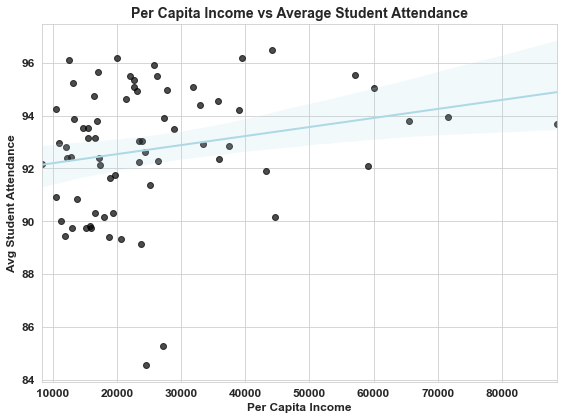


Per Capita Income vs Average Student Attendance:

Research Question: Is higher per capita income associated with higher student attendance?

H₁: Higher per capita income is associated with higher student attendance.
H₀: There is no relationship between per capita income and average student attendance.

Correlation: 0.22, p-value: 0.0657
Decision: Fail to reject H₀ – no significant relationship



In [120]:
plt.rcParams.update({'font.size': 12, 'font.weight': 'bold'})

# Define hypotheses
hypotheses = [
    {
        "x": "hardship_index",
        "y": "total_crimes",
        "H0": "There is no relationship between hardship index and total crimes.",
        "H1": "Higher hardship index is associated with higher total crimes.",
        "RQ": "Research Question: Is socioeconomic hardship associated with higher total crime counts at the community level?",
        "title": "Hardship Index vs Total Crimes"
    },
    {
        "x": "hardship_index",
        "y": "avg_student_attendance",
        "H0": "There is no relationship between hardship index and average student attendance.",
        "H1": "Higher hardship index is associated with lower student attendance.",
        "RQ": "Research Question: Is socioeconomic hardship associated with lower student attendance at the community level?",
        "title": "Hardship Index vs Average Student Attendance"
    },
    {
        "x": "per_capita_income",
        "y": "total_crimes",
        "H0": "There is no relationship between per capita income and total crimes.",
        "H1": "Higher per capita income is associated with lower total crimes.",
        "RQ": "Research Question: Is higher per capita income associated with lower total crime counts?",
        "title": "Per Capita Income vs Total Crimes"
    },
    {
        "x": "per_capita_income",
        "y": "avg_student_attendance",
        "H0": "There is no relationship between per capita income and average student attendance.",
        "H1": "Higher per capita income is associated with higher student attendance.",
        "RQ": "Research Question: Is higher per capita income associated with higher student attendance?",
        "title": "Per Capita Income vs Average Student Attendance"
    }
]

colors = ['brown', 'purple', 'orange', 'lightblue']

for i, h in enumerate(hypotheses):
    df = cross_df[[h["x"], h["y"]]].dropna()
    corr, pval = pearsonr(df[h["x"]], df[h["y"]])

    # Scatterplot with regression line
    plt.figure(figsize=(8,6))
    sns.regplot(
        data=df,
        x=h["x"],
        y=h["y"],
        scatter_kws={'alpha':0.7, 'color':'black'},
        line_kws={'color': colors[i], 'linewidth':2}
    )
    plt.title(h["title"], fontsize=14, fontweight='bold')
    plt.xlabel(h["x"].replace('_',' ').title(), fontsize=12, fontweight='bold')
    plt.ylabel(h["y"].replace('_',' ').title(), fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Print hypothesis summary
    print(f"\n{h['title']}:")
    print(f"\n{h['RQ']}")
    print(f"\nH₁: {h['H1']}")
    print(f"H₀: {h['H0']}")
    print(f"\nCorrelation: {corr:.2f}, p-value: {pval:.4f}")
    if pval < 0.05:
        print("Decision: Reject H₀ – significant relationship\n")
    else:
        print("Decision: Fail to reject H₀ – no significant relationship\n")

***
## **<font color="#B56447">Conclusion</font>**

The Chicago Community Analysis integrates Census, Schools, and Crime data to provide a comprehensive view of neighborhood conditions, educational engagement, and public safety. By examining crime patterns, school attendance, and socioeconomic indicators, this report highlights key trends and actionable insights for policymakers and educators.

**Key Takeaways:**  
- Crime is unevenly distributed across community areas, with certain neighborhoods consistently showing higher incident counts and localized safety concerns reflected in arrest rates and domestic incidents  
- Elementary and middle schools exhibit strong attendance (94%), whereas high schools show lower attendance (84%), suggesting challenges with student engagement or retention at higher grade levels  
- Communities with higher hardship indices tend to have slightly higher crime counts, while other relationships between socioeconomic indicators, crime, and attendance are generally weak in this dataset  
- Integrating Census, Schools, and Crime data enables multi-dimensional insights, showing how social, educational, and safety metrics intersect at the community level  

Overall, this analysis equips stakeholders with the insights needed to target interventions, monitor engagement, and design community-focused programs that address both educational and public safety outcomes.

**Future Recommendations:**  
- Focus resources on high-hardship communities with elevated crime rates and lower high school attendance  
- Develop targeted interventions to improve student engagement and retention in high schools  
- Leverage insights from strong elementary and middle school engagement to inform broader educational programs  
- Maintain consistent data cleaning, integration, and reporting practices for future multi-dataset analyses  
- Consider incorporating additional data sources (e.g., health outcomes, public services) to enhance decision-making

***